In [1]:
import matplotlib.pyplot as plt 
import numpy as np

from pathlib import Path 
from sklearn.preprocessing import normalize
from tmap import DefaultUMAP, TemporalMAP
from tmap.utils import plot_embeddings

/home/alan/.pyenv/versions/3.11.10/envs/jax/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### global params

In [2]:
N_TRACKS_TO_FIT = 30
MIN_DIST = 0.02

In [3]:
PATH = Path("./data/")
FILE = PATH / "trimmed_tracks.npy"

### load some tracking data

Note that the tracking data here is just an array (*n_i*, 32) for *n_i* consecutive time points (i.e. a track with length *n_i*) with 32 features per time point. 

In [4]:
tracks_raw = np.load(FILE)

In [5]:
tracks = [tracks_raw[tracks_raw[:, 0] == idx, 1:] for idx in np.unique(tracks_raw[:, 0])]

In [6]:
tracks = tracks[:N_TRACKS_TO_FIT]

In [7]:
# # what happens if we shuffle the temporal order?
# for t in tracks:
#     np.random.shuffle(np.asarray(t))

### iterate over the number of neighbors and plot the tmap embeddings for the trajectories
Compare betwen default UMAP and TMAP using the same parameters

DTW: 100%|██████████| 30/30 [00:00<00:00, 39.50it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 8406.99it/s]


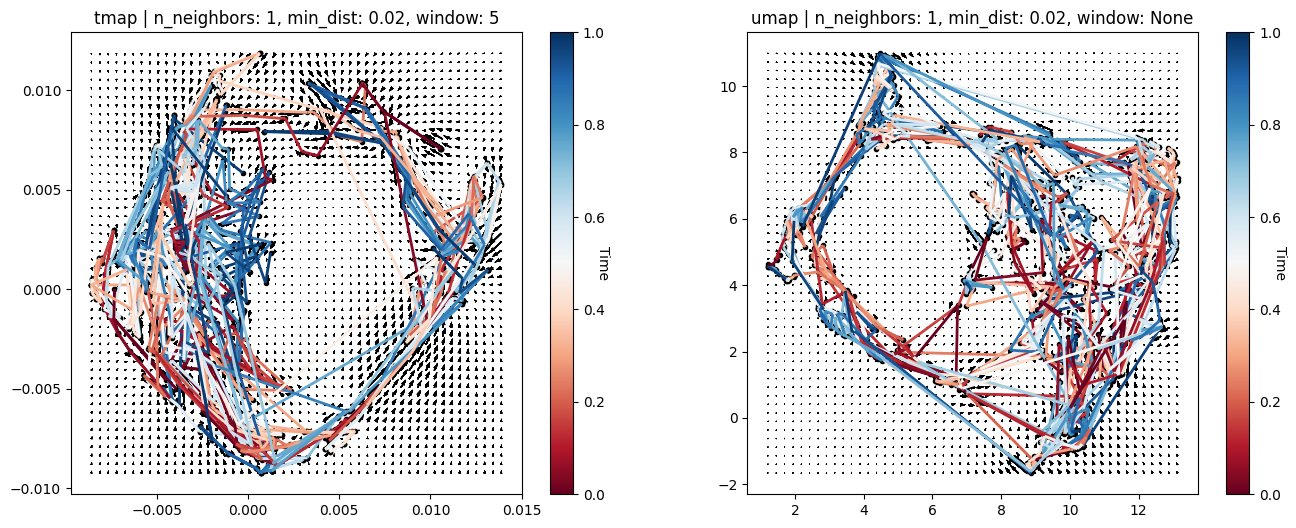

DTW: 100%|██████████| 30/30 [00:00<00:00, 40.04it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 9016.84it/s]


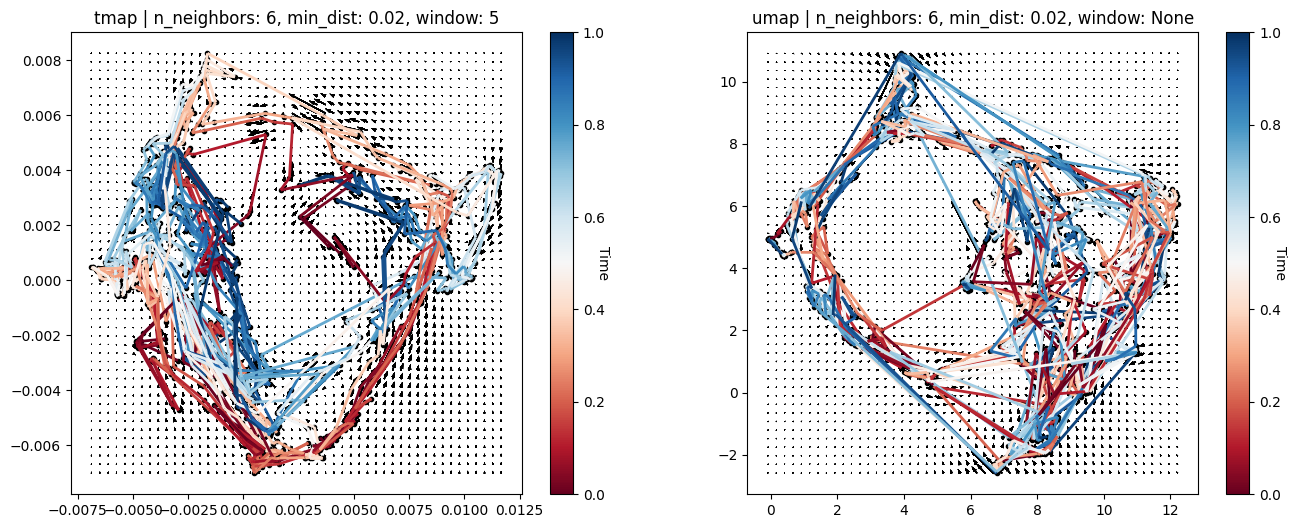

DTW: 100%|██████████| 30/30 [00:00<00:00, 39.71it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 8896.14it/s]


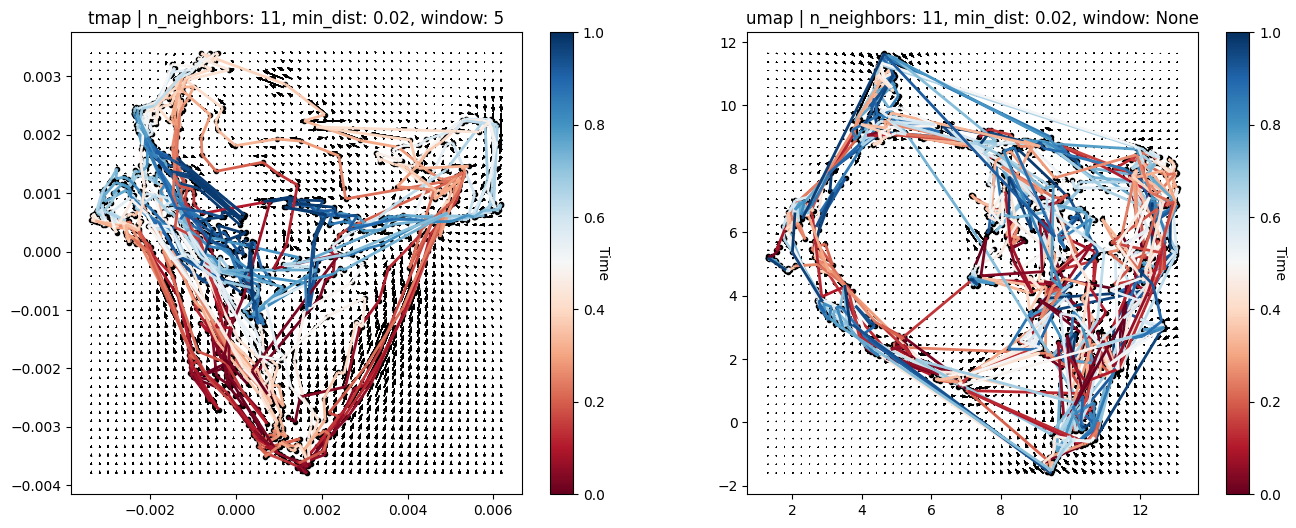

DTW: 100%|██████████| 30/30 [00:00<00:00, 39.07it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 8963.78it/s]


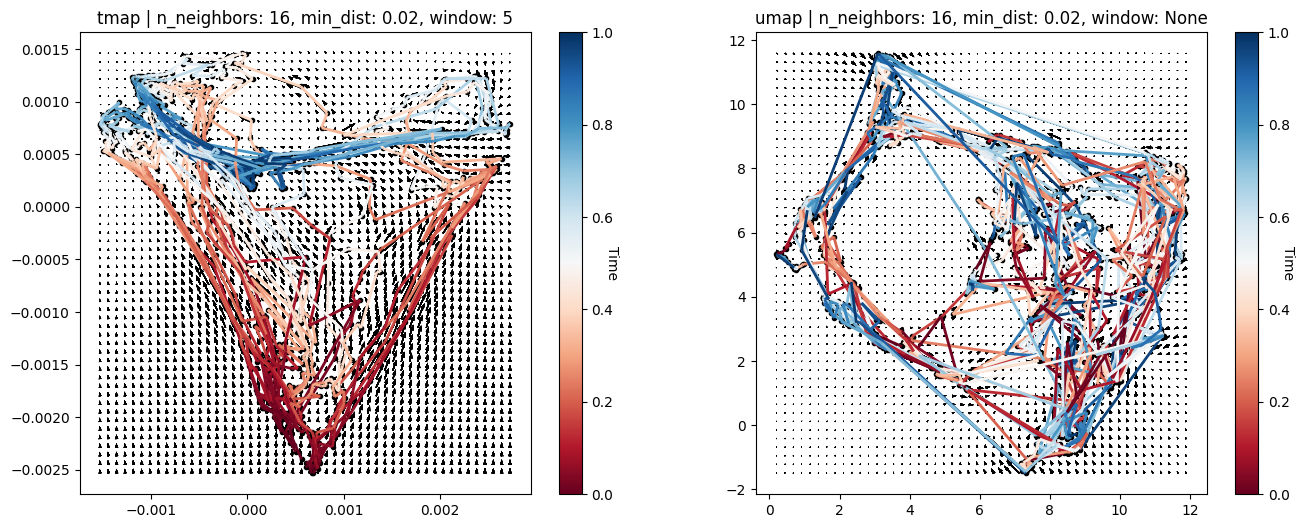

DTW: 100%|██████████| 30/30 [00:00<00:00, 39.59it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 8977.13it/s]


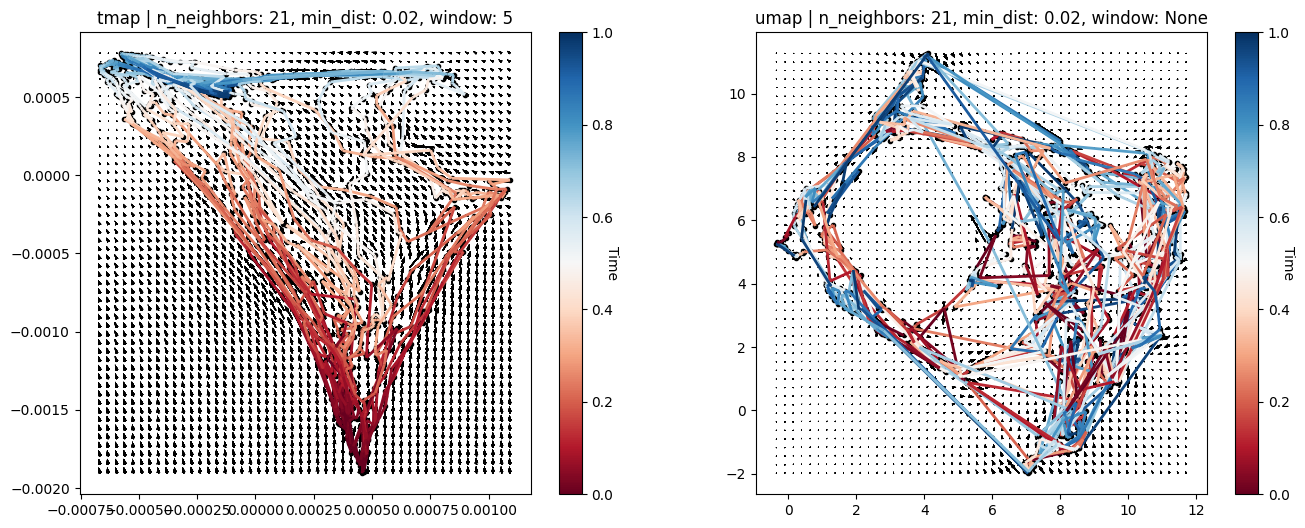

DTW: 100%|██████████| 30/30 [00:00<00:00, 39.45it/s]
/home/alan/Documents/Code/tmap/src/tmap/temporal.py:108: RuntimeWarning: overflow encountered in power
  return np.power(2, np.sum(prob))
Interpolation: 100%|██████████| 2500/2500 [00:00<00:00, 8980.08it/s]


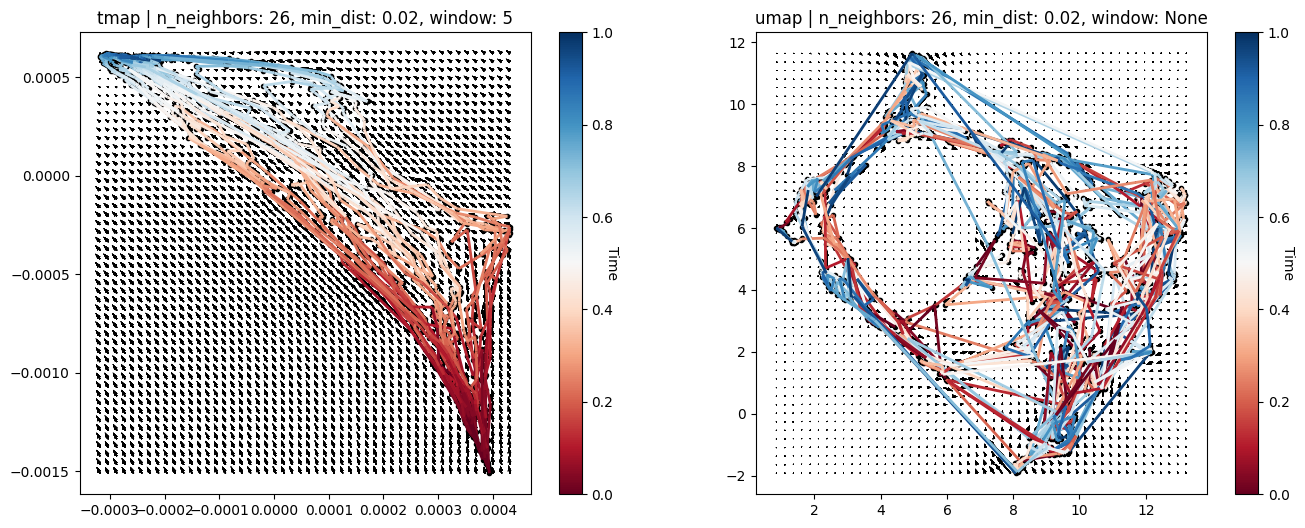

In [8]:
for p in np.arange(1, 31, 5):

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    ax0, ax1 = axs

    mapper = TemporalMAP(min_dist=MIN_DIST, n_neighbors=p, window=5)
    _ = mapper.fit(tracks)
    
    umapper = DefaultUMAP(min_dist=MIN_DIST, n_neighbors=p)
    _ = umapper.fit(tracks)

    plot_embeddings(mapper, fig=fig, ax=ax0, title="tmap")
    plot_embeddings(umapper, fig=fig, ax=ax1, title="umap")

    plt.show()